In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import dlib
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from imageio import imread
from skimage.transform import resize
from scipy.spatial import distance
from keras.models import load_model

%matplotlib inline

Using TensorFlow backend.


In [2]:
def prewhiten(x):
#     print('prewhiten x',x.shape)
    mean = np.mean(x)
#     print('mean',mean.shape, mean)
    std = np.std(x)
#     print('std',std.shape, std, 1.0/np.sqrt(x.size))
    std_adj = np.maximum(std, 1.0/np.sqrt(x.size))
#     print('std_adj', std_adj)
    y = np.multiply(np.subtract(x, mean), 1/std_adj)
#     print('y',y.shape)
    return y

In [3]:
a = np.array([[1, 2], [3, 4],[5,6],[7,8]])
print(a)
print("mean",np.mean(a))
print("std",np.std(a))
print("prewhite", prewhiten(a))


[[1 2]
 [3 4]
 [5 6]
 [7 8]]
mean 4.5
std 2.29128784748
prewhite [[-1.52752523 -1.09108945]
 [-0.65465367 -0.21821789]
 [ 0.21821789  0.65465367]
 [ 1.09108945  1.52752523]]


In [4]:
img = imread("./sample.jpg")
img_arr = np.asarray(img)
print(img_arr.shape)
print(np.mean(img_arr))
print(np.std(img_arr))
print("before")
print(img_arr)
print("after")
print(prewhiten(img_arr))

(3, 3, 3)
133.592592593
118.369559168
before
[[[255  38   2]
  [  5  52 254]
  [255 255 255]]

 [[  0   2   0]
  [  0 254   0]
  [254 254   0]]

 [[  0 254 254]
  [212 170  70]
  [255   2 255]]]
after
[[[ 1.0256641  -0.8075775  -1.11170975]
  [-1.08636539 -0.68930385  1.01721598]
  [ 1.0256641   1.0256641   1.0256641 ]]

 [[-1.12860598 -1.11170975 -1.12860598]
  [-1.12860598  1.01721598 -1.12860598]
  [ 1.01721598  1.01721598 -1.12860598]]

 [[-1.12860598  1.01721598  1.01721598]
  [ 0.66239503  0.30757407 -0.53723772]
  [ 1.0256641  -1.11170975  1.0256641 ]]]


In [5]:
img = imread("./sample2.jpg")
img_arr = np.asarray(img)
print(img_arr.shape)
print(np.mean(img_arr))
print(np.std(img_arr))
print("before")
print(img_arr)
print("after")
print(prewhiten(img_arr))

(5, 4, 3)
127.966666667
126.76815671
before
[[[255   1   1]
  [  1 255   1]
  [  1   1 255]
  [255 254 255]]

 [[  1   1   1]
  [255 255   1]
  [  1 255 255]
  [255   1 255]]

 [[  0   2 255]
  [255 255 255]
  [254   0   0]
  [  1 255   0]]

 [[  3 255 255]
  [255   1 255]
  [  2   2   2]
  [254 253   2]]

 [[255 255 255]
  [  1   1   1]
  [254 254 254]
  [  2   2   2]]]
after
[[[ 1.00209182 -1.00156593 -1.00156593]
  [-1.00156593  1.00209182 -1.00156593]
  [-1.00156593 -1.00156593  1.00209182]
  [ 1.00209182  0.99420341  1.00209182]]

 [[-1.00156593 -1.00156593 -1.00156593]
  [ 1.00209182  1.00209182 -1.00156593]
  [-1.00156593  1.00209182  1.00209182]
  [ 1.00209182 -1.00156593  1.00209182]]

 [[-1.00945435 -0.99367751  1.00209182]
  [ 1.00209182  1.00209182  1.00209182]
  [ 0.99420341 -1.00945435 -1.00945435]
  [-1.00156593  1.00209182 -1.00945435]]

 [[-0.9857891   1.00209182  1.00209182]
  [ 1.00209182 -1.00156593  1.00209182]
  [-0.99367751 -0.99367751 -0.99367751]
  [ 0.99420341

In [6]:
def l2_normalize(x, axis=-1, epsilon=1e-10):
    output = x / np.sqrt(np.maximum(np.sum(np.square(x), axis=axis, keepdims=True), epsilon))
    return output

In [7]:
a = np.array([[0,1,2,3,6,2]])
b = np.array([[7,8,4,5,3,3]])
c = np.array([[1,2,3,5,6,9]])
z = np.concatenate([a,b,c],axis=0)
axis = -1
print(a)
print(a.shape)
print(z)
print(z.shape)
a = z ###
sq = np.square(a)
summ = np.sum(sq, axis=-1, keepdims=True)
epsilon=1e-10
maxx = np.maximum(summ, epsilon)
sq2 = np.sqrt(maxx)
div = a / sq2
print(sq)
print(summ)
print(maxx)
print(sq2)
print(div)
print(l2_normalize(a))


[[0 1 2 3 6 2]]
(1, 6)
[[0 1 2 3 6 2]
 [7 8 4 5 3 3]
 [1 2 3 5 6 9]]
(3, 6)
[[ 0  1  4  9 36  4]
 [49 64 16 25  9  9]
 [ 1  4  9 25 36 81]]
[[ 54]
 [172]
 [156]]
[[  54.]
 [ 172.]
 [ 156.]]
[[  7.34846923]
 [ 13.11487705]
 [ 12.489996  ]]
[[ 0.          0.13608276  0.27216553  0.40824829  0.81649658  0.27216553]
 [ 0.533745    0.60999428  0.30499714  0.38124643  0.22874786  0.22874786]
 [ 0.08006408  0.16012815  0.24019223  0.40032038  0.48038446  0.72057669]]
[[ 0.          0.13608276  0.27216553  0.40824829  0.81649658  0.27216553]
 [ 0.533745    0.60999428  0.30499714  0.38124643  0.22874786  0.22874786]
 [ 0.08006408  0.16012815  0.24019223  0.40032038  0.48038446  0.72057669]]


In [8]:
def load_and_align_images(image_filepaths, margin):
    detector = dlib.get_frontal_face_detector()

    aligned_images = []
    for image_filepath in image_filepaths:
        try:
            img = imread(image_filepath)
            faces = detector(img, 1)

            skipMulti = False
            if (not skipMulti and len(faces) > 0) or len(faces) == 1:
                bb = max(faces, key=lambda rect: rect.width() * rect.height())

            cropped = img[bb.top()-margin//2:bb.bottom()+margin//2,
                          bb.left()-margin//2:bb.right()+margin//2, :]
            aligned = resize(cropped, (image_size, image_size), mode='reflect')
            prewhitened = prewhiten(aligned)
#             print(prewhitened)
#             plt.imshow(prewhitened)
#             plt.show()
            aligned_images.append(prewhitened)
        except:
            print('except!',image_filepath)
            
    return np.array(aligned_images)

In [9]:
def calc_dist(img_name0, img_name1):
    return distance.euclidean(data[img_name0]['emb'], data[img_name1]['emb'])

def calc_dist_plot(img_name0, img_name1):
    print(calc_dist(img_name0, img_name1))
    plt.subplot(1, 2, 1)
    plt.imshow(imread(data[img_name0]['image_filepath']))
    plt.subplot(1, 2, 2)
    plt.imshow(imread(data[img_name1]['image_filepath']))

In [10]:
image_dir_basepath = '/Users/osuzuki/web_apps/deep_learning/team14/facenet/member_test/member_images/'
image_size = 160

model_path = '../model/facenet-keras/model/facenet_keras.h5'
model = load_model(model_path)

/Users/osuzuki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [11]:
data = {}
names = ['takemoto', 'taniai']
max_num_img = 100
margin = 10
batch_size = 20

for name in names:
    image_dirpath = os.path.abspath(image_dir_basepath + 'images_{}/'.format(name))
    image_filepaths = [os.path.join(image_dirpath, f) for f in os.listdir(image_dirpath)][:max_num_img]
    image_filepaths = [path for path in image_filepaths if ".DS_Store" not in path]
    aligned_images = load_and_align_images(image_filepaths, margin)
    embs = []
    for start in range(0, max_num_img, batch_size):
        embs.append(model.predict_on_batch(aligned_images[start:start+batch_size]))    
    print(len(embs)) #
    print("shape",embs[0].shape)
    print("raw0",embs[0][0])
    print("raw1",embs[0][3])
    print("raw2",embs[1][4])
    print("param",np.concatenate(embs, axis=0).shape)
    embs = l2_normalize(np.concatenate(embs, axis=0))
    print("after",embs.shape)
    print("len",len(image_filepaths))
    for i in range(len(image_filepaths)):
        data['{}{}'.format(name, i)] = {'image_filepath' : image_filepaths[i],
                                        'emb' : embs[i]}

5
shape (20, 128)
raw0 [ 1.05766726 -0.7137686  -0.91625381  0.46576062  0.78555924 -0.71456242
  0.15474279 -1.21638882  0.88540041 -0.45358384  0.60170364 -0.61887199
 -1.96016467 -2.22868919  0.19513994 -1.76512623  1.17497194 -0.03806526
 -1.66455042 -0.45881969 -0.47338259 -0.47256669 -0.052561   -0.73810399
  1.57512426  0.19095215 -0.12272391  0.90664828  0.20257528 -0.37074095
  0.84430563  1.12789607 -1.47816551 -0.35641944  0.5274213  -1.46350837
 -0.63642496  1.28879225  0.11606297 -0.51152313 -1.14372551  0.25435063
 -0.52194059 -0.66739744 -0.9089964   0.24974361 -0.4187817  -0.14099795
 -1.42531073  0.98556435  0.02262684 -0.63205451  1.49435413 -0.48426571
  1.00654161  0.65257597  0.74030381 -1.04726243 -1.38645017 -1.49740613
  0.70770413 -0.82485694 -0.00661221  1.23974848 -0.36102962  1.9234345
 -0.15152562 -0.4768683   0.75055993 -0.93657863  0.1845656  -1.38181961
 -0.42883313 -0.66988766 -0.13955921  1.0008564  -0.17343538 -0.06858127
 -0.46469265 -0.20733753  0.2

In [12]:
print("taniai0",data['taniai0']['emb'])
print("taniai1",data['taniai1']['emb'])
print("taniai2",data['taniai2']['emb'])
print("taniai3",data['taniai3']['emb'])
print("taniai4",data['taniai4']['emb'])
print("taniai5",data['taniai5']['emb'])
# print("takemoto0",data['takemoto0']['emb'])
# print("takemoto1",data['takemoto1']['emb'])

taniai0 [ 0.08377542 -0.12515712 -0.11020963 -0.05275028 -0.01219479 -0.03315884
 -0.00412797 -0.11254758 -0.01480856 -0.13160251  0.00244164  0.01021023
 -0.01371614 -0.19916672  0.0894614  -0.01621673  0.12415119 -0.09966249
  0.0115882   0.01853415 -0.0808755   0.00422128 -0.21937357 -0.01985799
  0.01130673  0.09249012  0.01635875  0.13870876  0.00163219  0.043696
  0.13930194  0.15022364 -0.06088873 -0.11941687 -0.02673912 -0.01299063
 -0.16683443  0.08209022  0.13923837  0.09184166 -0.0516715   0.09609609
  0.06041724 -0.1186224   0.02152592 -0.00742746  0.02078098  0.08218141
 -0.07962836  0.12453706  0.05168916  0.05423415  0.09698663 -0.06236979
  0.10260718  0.00272461 -0.07892736  0.01544469  0.02383372 -0.04090069
 -0.01042554 -0.1512793  -0.01524346  0.13708258  0.07551503  0.12023181
  0.08202967 -0.03408637 -0.01847113 -0.03902873  0.04379306 -0.21573092
  0.0645232  -0.14781064 -0.02522495  0.08115476 -0.07500043  0.10245149
 -0.14631851 -0.00976895 -0.05356723  0.02952

0.2770192325115204


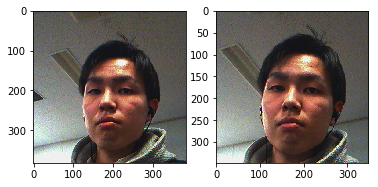

In [13]:
calc_dist_plot('takemoto0', 'takemoto1')

0.473338782787323


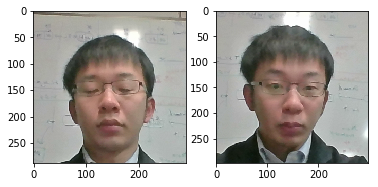

In [14]:
calc_dist_plot('taniai0', 'taniai1')

1.0398305654525757


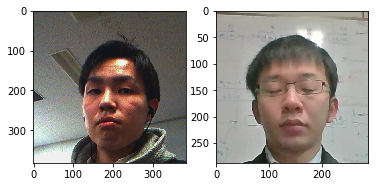

In [15]:
calc_dist_plot('takemoto0', 'taniai0')

1.068949818611145


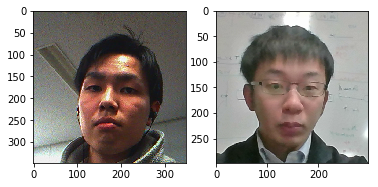

In [16]:
calc_dist_plot('takemoto1', 'taniai1')

1.0501813888549805


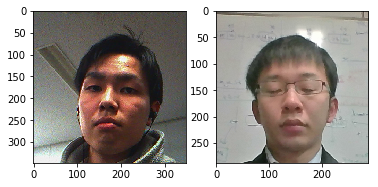

In [17]:
calc_dist_plot('takemoto1', 'taniai0')